<a href="https://colab.research.google.com/github/sujiny123/Analysis/blob/main/%EC%BD%94%ED%98%B8%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코호트 분석의 정의
코호트 분석(COHORT Analysis)이란 특정 기간 동안 일정한 기준으로 동일한게 묶을 수 있는 사용자들의 집단을 분석하는 기법이다.

가장 흔하게 쓰이는 방법은 특정 날짜를 기준으로 사용자들을 하나의 집단으로 묶어 이들의 행동을 분석하는 것이다.

## 코호트 분석을 하는 이유
가장 핵심적인 것은 왜 고객들을 하나의 집단으로 묶는가를 아는 것이다. 실무적으로는 고객들의 Exit Rate와 Retention Rate(재방문율 혹은 재구매율)을 파악하여 정기적으로 문제를 진단하고, 해결 전략을 도출하기 위한 대시보드로 많이 활용된다.

또 다른 활용도는 고객집단 별로 고객 생애 가치(LTV, Lifetime Value)를 계산하고, 서비스의 고착도(Stickiness)를 판단할 수 있는 아주 중요한 수단이 된다.

예를 들어 5월 가정의 달 프로모션 때문에 가입한 고객들은 과연 얼마나 서비스에 남아 있고, 총 소비를 얼마나 하는지 궁금할 수도 있다. 이럴 때 코호트 분석을 활용하면, 비즈니스 질문에 가장 최적화된 답을 내놓을 수 있다.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

retail = pd.read_csv('retail.csv')

In [50]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [51]:
retail['total'] = retail['Quantity'] * retail['Price']

In [52]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [53]:
from datetime import date, time

In [54]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [58]:
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y.%m')

In [59]:
first_order = retail.groupby('Customer ID').date.min()

In [60]:
df = retail.set_index('Customer ID')

In [61]:
df['firstorder'] = first_order

In [62]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,total,date,firstorder
Customer ID,,,,,,,,,,
13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.40,2009.12,2009.12
13085.0,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.00,2009.12,2009.12
13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.00,2009.12,2009.12
13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.80,2009.12,2009.12
13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.00,2009.12,2009.12
...,...,...,...,...,...,...,...,...,...,...
12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011.12,2011.08
12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011.12,2011.08
12680.0,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,2011.12,2011.08


In [63]:
df['ordercycle']=df['InvoiceDate'].dt.strftime('%Y.%m')

In [64]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,total,date,firstorder,ordercycle
Customer ID,,,,,,,,,,,
13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.40,2009.12,2009.12,2009.12
13085.0,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.00,2009.12,2009.12,2009.12
13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.00,2009.12,2009.12,2009.12
13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.80,2009.12,2009.12,2009.12
13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.00,2009.12,2009.12,2009.12
...,...,...,...,...,...,...,...,...,...,...,...
12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011.12,2011.08,2011.12
12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011.12,2011.08,2011.12
12680.0,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,2011.12,2011.08,2011.12


In [65]:
df.drop(['Invoice','StockCode'], axis=1, inplace=True)

In [66]:
df

,Description,Quantity,InvoiceDate,Price,Country,total,date,firstorder,ordercycle
Customer ID,,,,,,,,,
13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.40,2009.12,2009.12,2009.12
13085.0,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.00,2009.12,2009.12,2009.12
13085.0,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.00,2009.12,2009.12,2009.12
13085.0,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.80,2009.12,2009.12,2009.12
13085.0,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.00,2009.12,2009.12,2009.12
...,...,...,...,...,...,...,...,...,...
12680.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011.12,2011.08,2011.12
12680.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011.12,2011.08,2011.12
12680.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,2011.12,2011.08,2011.12


In [71]:
## 주기별 구매 user 계산
df.reset_index(inplace = True)
co1 = df.groupby(['firstorder', 'ordercycle'])['Customer ID'].nunique()
co1 = co1.reset_index()
co1.rename({'Customer ID': 'totalusers'}, axis = 1, inplace = True)

In [72]:
## 주기별 구매 금액 계산
co2 = df.groupby(['firstorder', 'ordercycle']).total.sum()
co2 = co2.reset_index()
co2.rename({'total': 'totalprice'}, axis = 1, inplace = True)

In [73]:
co = co1.merge(co2, on = ['firstorder', 'ordercycle'])

In [74]:
co.head()

,firstorder,ordercycle,totalusers,totalprice
0,2009.12,2009.12,1045,663272.050
1,2009.12,2010.01,392,381102.931
2,2009.12,2010.02,358,294002.542
3,2009.12,2010.03,447,386887.810
4,2009.12,2010.04,410,304759.150


In [75]:
co

,firstorder,ordercycle,totalusers,totalprice
0,2009.12,2009.12,1045,663272.050
1,2009.12,2010.01,392,381102.931
2,2009.12,2010.02,358,294002.542
3,2009.12,2010.03,447,386887.810
4,2009.12,2010.04,410,304759.150
...,...,...,...,...
320,2011.10,2011.11,74,33103.210
321,2011.10,2011.12,39,10787.430
322,2011.11,2011.11,192,80631.650
323,2011.11,2011.12,33,12509.240


In [76]:
! pip install ipypb
from ipypb import ipb
temp = []

for i in ipb(range(co.shape[0])):
    f_first_order = pd.to_datetime(co.firstorder[i]).to_period('M')
    f_order_cycle = pd.to_datetime(co.ordercycle[i]).to_period('M')

    month_diff = (f_order_cycle - f_first_order).n

    temp.append(month_diff)
co['cohortperiod'] = temp


 [████████████████████████████████████████████████████████████] 325/325 [00:00<00:00, 0.00s/it]

In [77]:
## 첫 번째. 재구매율 계산을 위한 Pandas Unstack 활용
co_retention = co.set_index(['firstorder', 'cohortperiod'])
co_retention = co_retention.totalusers.unstack(1)
retention = co_retention.div(co_retention[0],axis = 0)


## 두 번째. 구매 규모 형태 치환을 위한 Pandas Unstack 활용
co_purchase = co.set_index(['firstorder', 'cohortperiod'])
co_purchase = co_purchase.totalprice.unstack(1)

<Axes: xlabel='cohortperiod', ylabel='firstorder'>

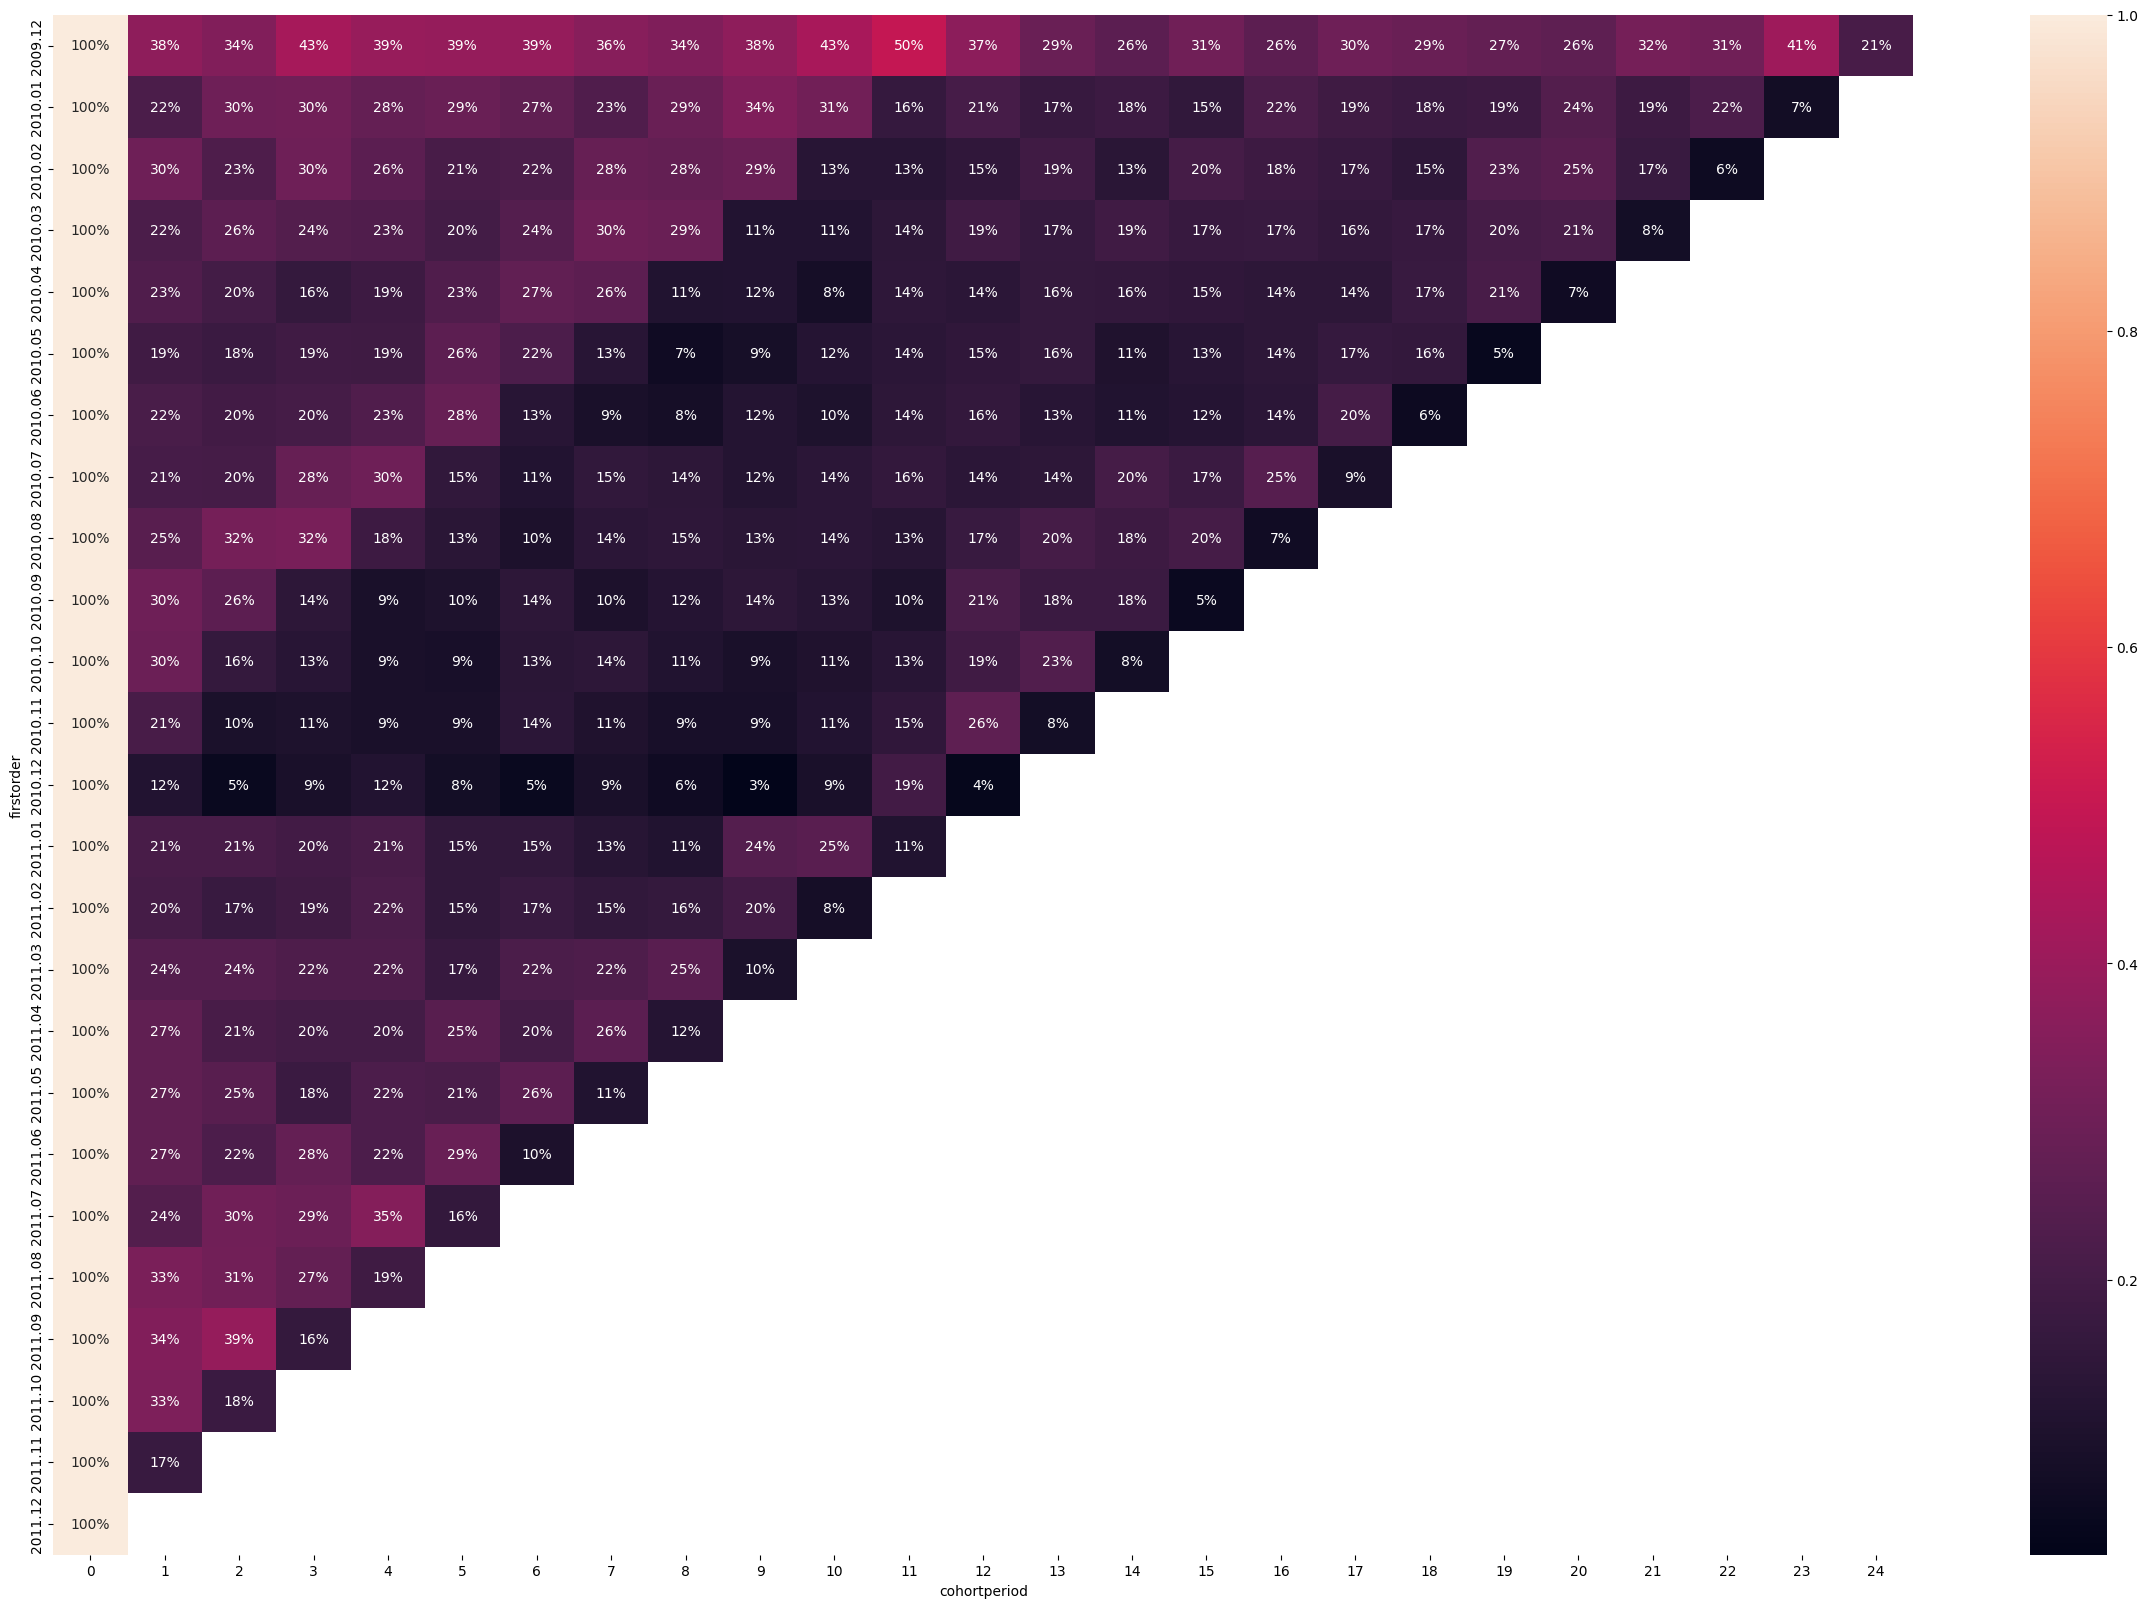

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

## 재구매율 시각화 진행
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(retention, annot = True, fmt = '.0%')

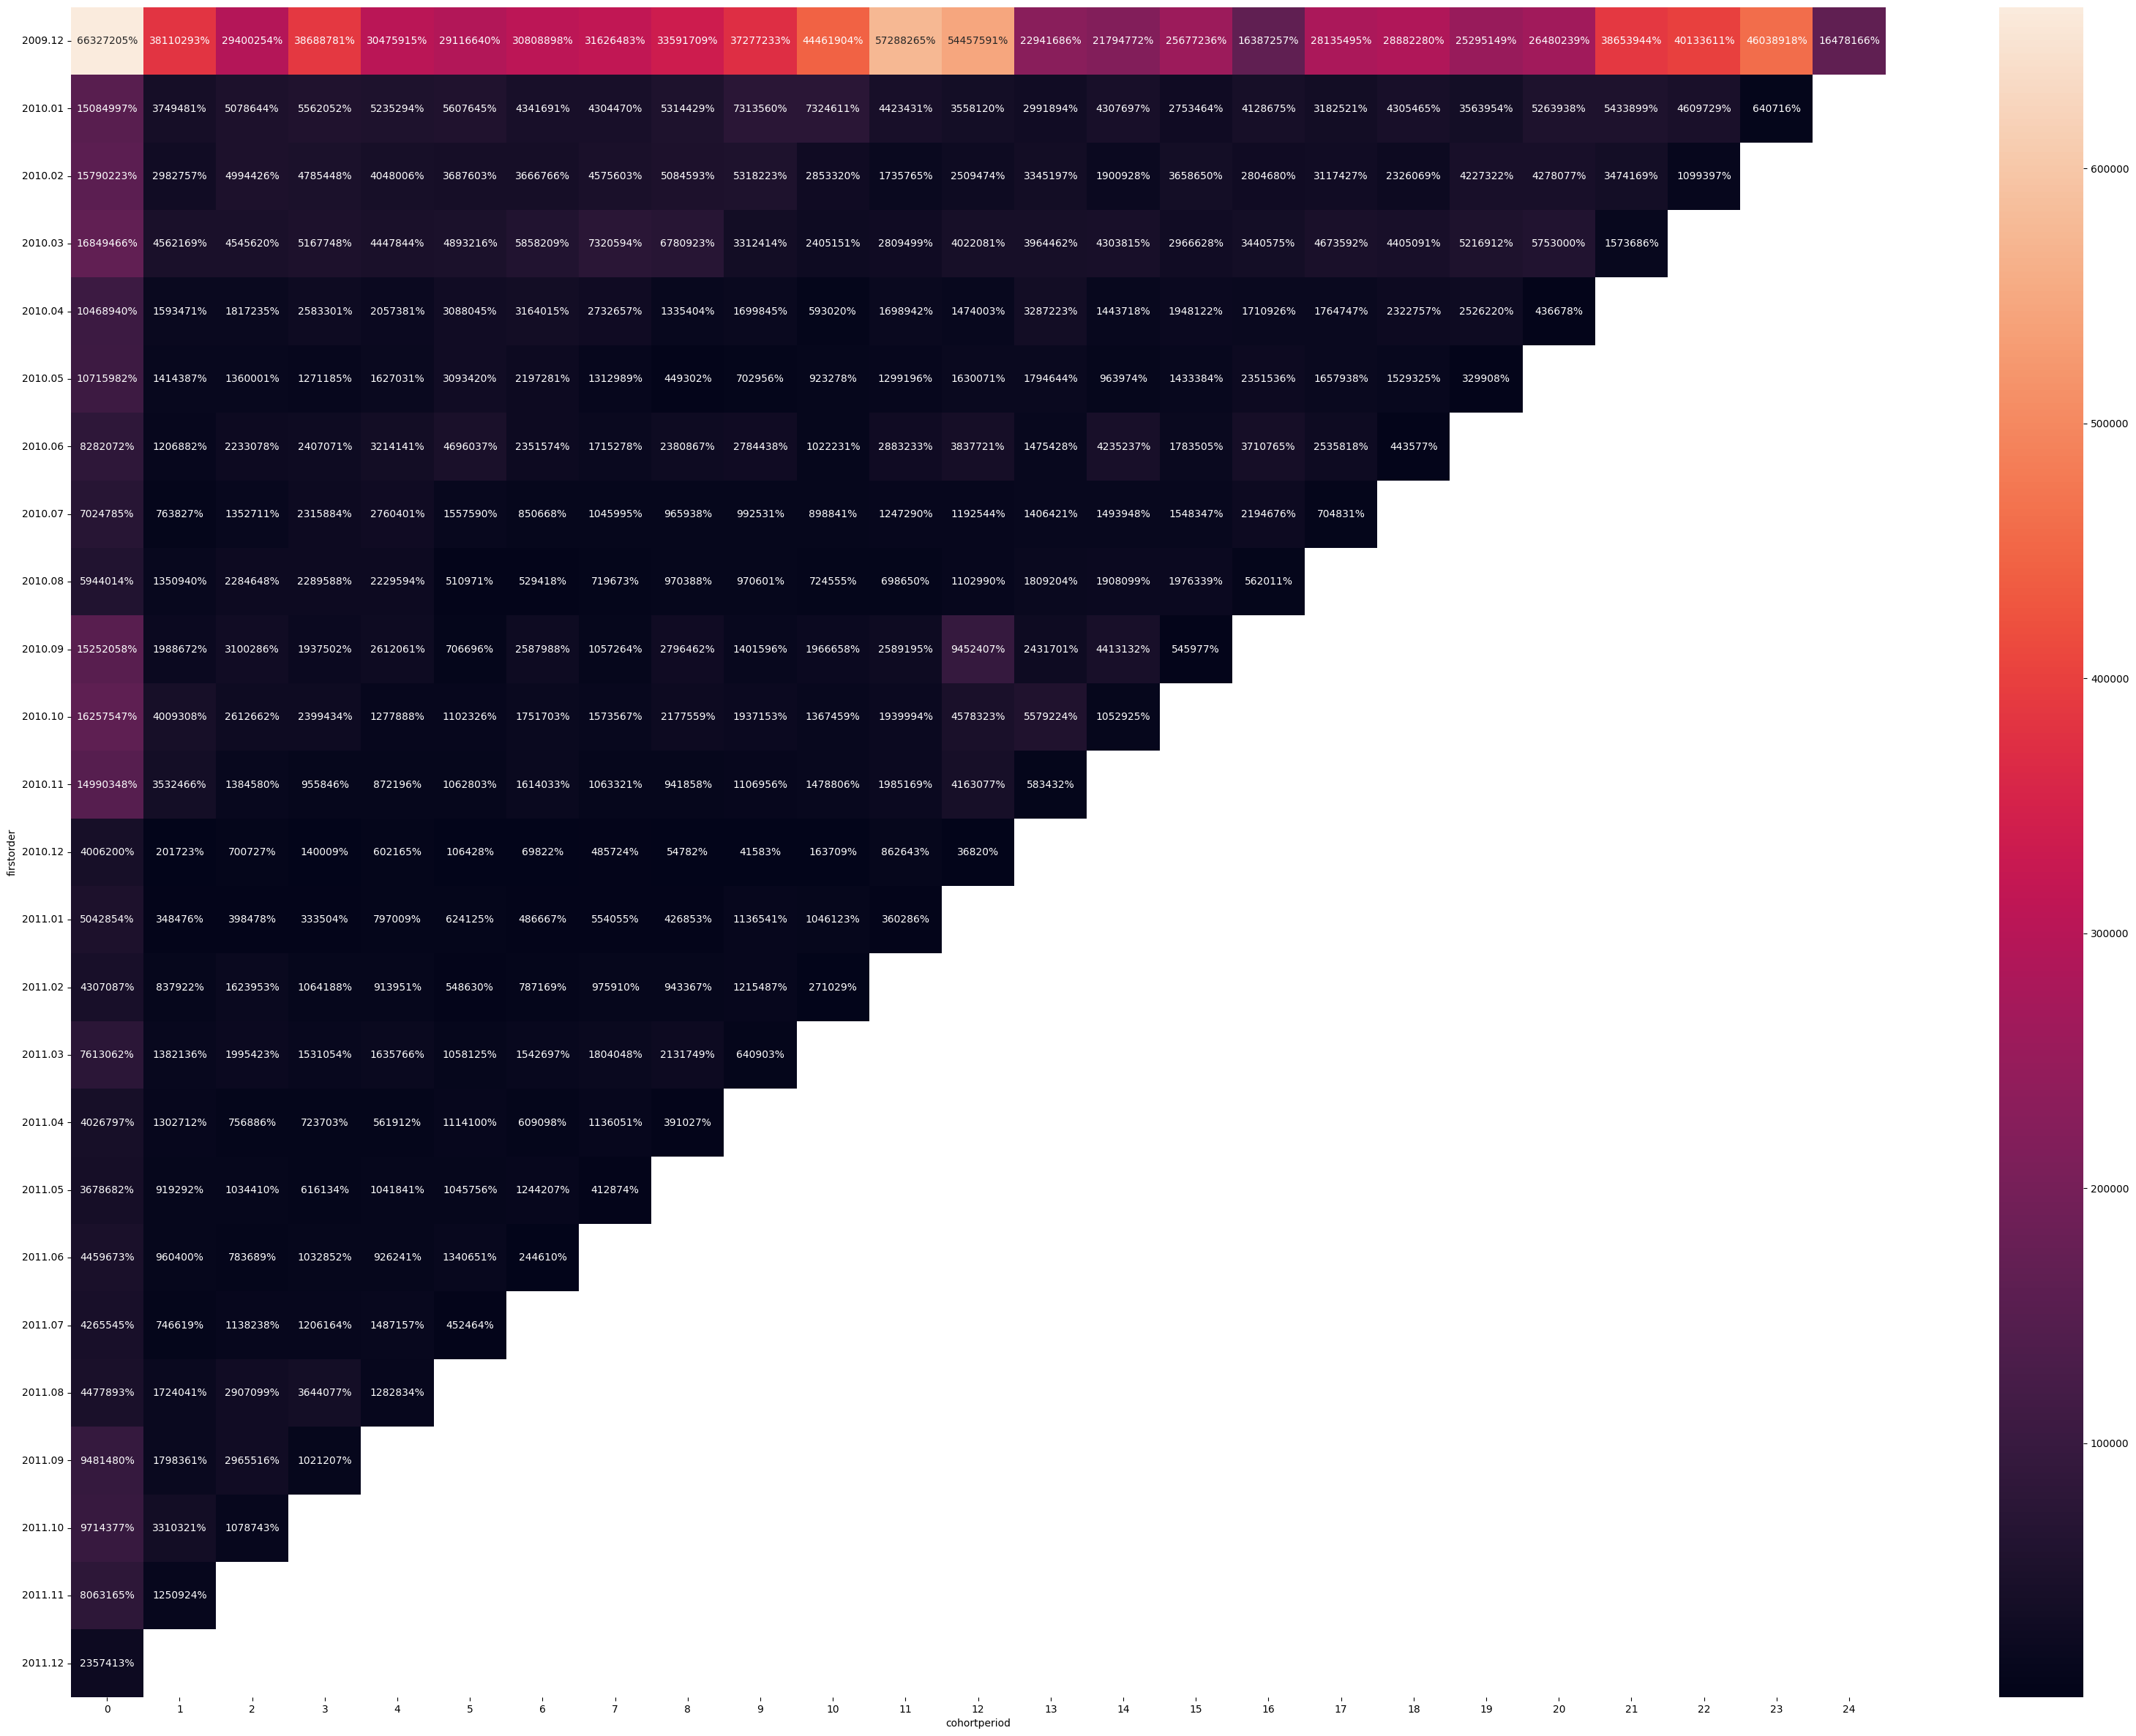

In [86]:
## 구매 규모 시각화
plt.rcParams['figure.figsize'] = (40,30)
sns.heatmap(co_purchase, annot = True, fmt = '.0%')

plt.yticks(rotation = 360);

- 재구매율은 거의 다 비슷했지만 2009년 12월에 약간 더 많았다. 그리고 구매 규모는 2009년 12월이 유일하게 매우 큰 규모이고 다른 월들은 비슷하게 나왔다.
- 2009년 12월을 조사할 필요가 있다.